# Image data explorations

For the image dataset we are working on a waste recycling plant dataset, which can be found on [Kaggle](https://www.kaggle.com/datasets/parohod/warp-waste-recycling-plant-dataset). There are three different versions of this dataset. We are using WaRP-C which contains cutout images of a single object. 
In this notebook we are going to explore the image dataset using pandas, PIL and matplotlib. Therefore the first step will be to import the libraries

In [13]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

Underneath you can find the code to load all images into a pandas dataframe. With this we are also adding some other information to this dataset. This includes the width and height of the images together with their area and image ratio. We also add the label of the image. Lastly, the image itself is saved under the "image" column in PIL Image format.

In [15]:
count = 0
images = pd.DataFrame(columns=["width", "height","area", "ratio", "label", "image"])
directory = 'datasets/Warp-C/'
for root_dir, cur_dir, files in os.walk(directory):
    print("root dir: " + str(root_dir))
    label = os.path.basename(os.path.normpath(root_dir))
    for file in files:
        if ".jpg" in file:
            file_name = root_dir +"/"+ file
            count += 1
            image = Image.open(file_name)
            image_size = image.size
            ratio = image_size[0]/image_size[1]
            row = [image_size[0], image_size[1], image_size[0]*image_size[1], ratio, label, image]
            images.loc[len(images)] = row

print("file count: " + str(count))
print(images)

root dir: datasets/Warp-C/
root dir: datasets/Warp-C/bottle-blue
root dir: datasets/Warp-C/bottle-blue-full
root dir: datasets/Warp-C/bottle-blue5l
root dir: datasets/Warp-C/bottle-blue5l-full
root dir: datasets/Warp-C/bottle-dark
root dir: datasets/Warp-C/bottle-dark-full
root dir: datasets/Warp-C/bottle-green
root dir: datasets/Warp-C/bottle-green-full
root dir: datasets/Warp-C/bottle-milk
root dir: datasets/Warp-C/bottle-milk-full
root dir: datasets/Warp-C/bottle-multicolor
root dir: datasets/Warp-C/bottle-multicolorv-full
root dir: datasets/Warp-C/bottle-oil
root dir: datasets/Warp-C/bottle-oil-full
root dir: datasets/Warp-C/bottle-transp
root dir: datasets/Warp-C/bottle-transp-full
root dir: datasets/Warp-C/bottle-yogurt
root dir: datasets/Warp-C/canister
root dir: datasets/Warp-C/cans
root dir: datasets/Warp-C/detergent-box
root dir: datasets/Warp-C/detergent-color
root dir: datasets/Warp-C/detergent-transparent
root dir: datasets/Warp-C/detergent-white
root dir: datasets/Warp-C/

## Looking at the images
Your first step will be to take a look at a sample for the dataset to get a grasp of what the images look like.

To get a random sample of a pandas dataframe you can use the following function.
<code>dataframe.sample(n=size_of_sample)</code>

To be able to show the images you will have to iterate over the dataframe. This can be done as follows:
<code>for index, row in dataframe.iterrows():</code>

Lastly to show the images you can plot them using subplots in matplotlib:
</br>
<code>
fig, axes = plt.subplots(nrows=number_of_rows, ncols=number_of_columns, figsize=(width, heigth) ) </br>
axes[x,y].imshow(PIL_image)
</code>

      width  height    area     ratio              label  \
3220    120     317   38040  0.378549  bottle-green-full   
353     106     148   15688  0.716216        bottle-blue   
1357    172     204   35088  0.843137      bottle-blue5l   
6103    207     247   51129  0.838057      bottle-transp   
3917    166      71   11786  2.338028  bottle-multicolor   
2559    331     308  101948  1.074675       bottle-green   
2210    270     347   93690  0.778098        bottle-dark   
9417    120     254   30480  0.472441       glass-transp   
8015    321     348  111708  0.922414    detergent-color   
427     105     180   18900  0.583333        bottle-blue   

                                                  image  
3220  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
353   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1357  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
6103  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3917  <PIL.JpegImagePlugin.JpegImageFile image mo

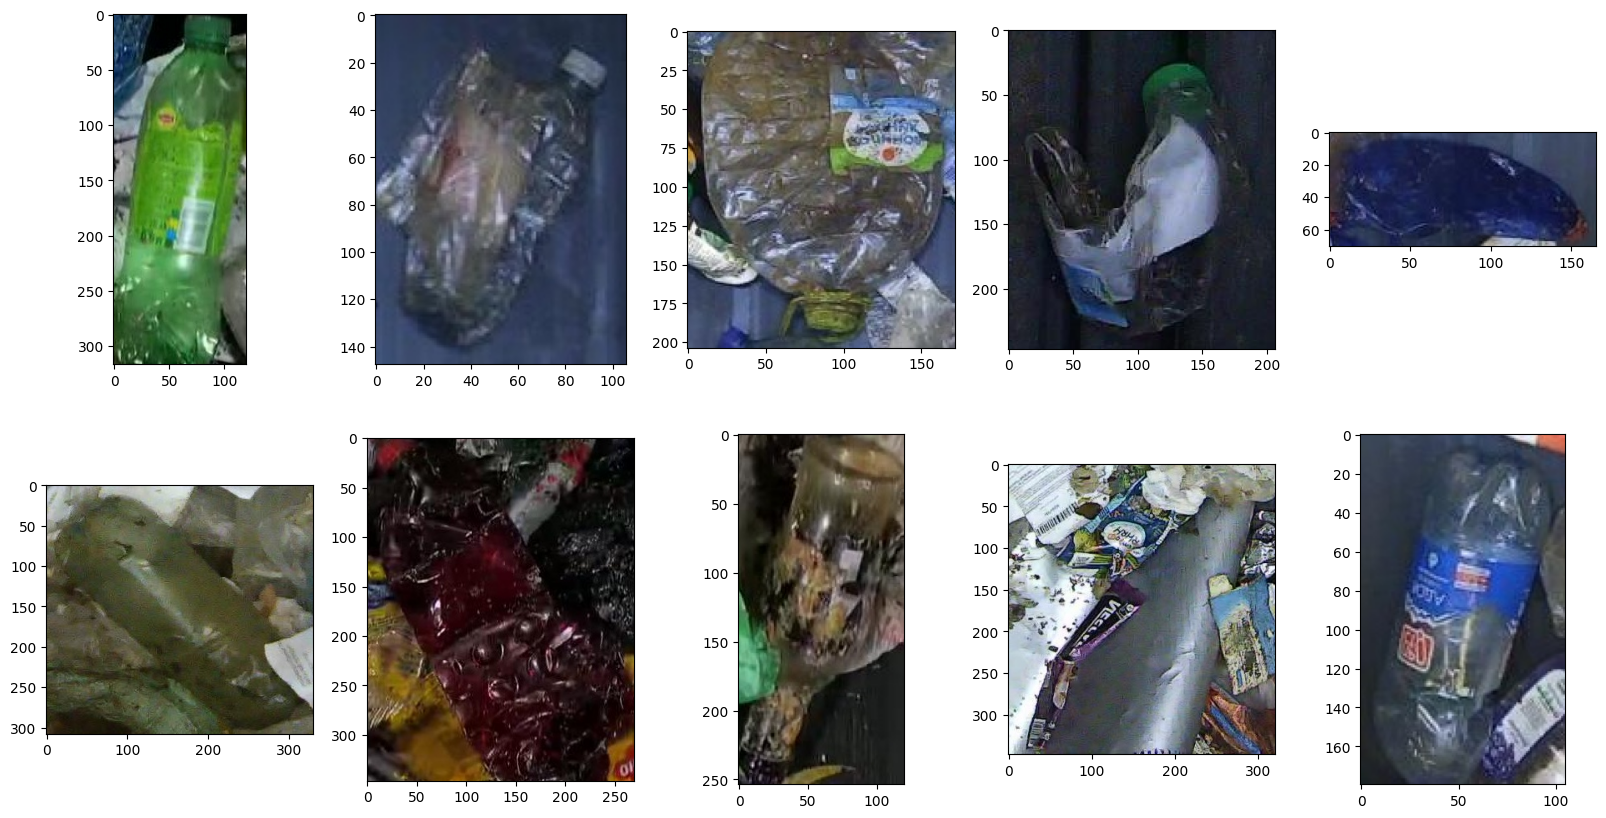

In [16]:
df_sample = images.sample(n=10)
print(df_sample)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

count = 0
for index, row in df_sample.iterrows():
    if count < 5:
        axes[0,count].imshow(row["image"])
    else:
        axes[1, count-5].imshow(row["image"])
    count += 1

## Looking at the image sizes

The next step will be to get a grasp of the different image sizes. That is why we saved the width, height, area and aspect ratio of the images. To explore the image data sizes you can use the following functions.

- In Pandas it is possible to easily create histograms of all numeric values using:</br> <code>dataframe.hist(figsize=[width, height], bins=n_bins)</code>
- To create a scatter plot of two columns, you can use matplotlib:</br><code>plt.scatter(dataframe["column_1], dataframe["column_2"]) </br> plt.show()</code> 
- To get a row of a dataframe where a certain column has its maximum value, you can use:</br> <code>maximum = dataframe.loc[dataframe['coluumn'].idxmax()]</code>
- A similar function can be used to get the minimum value: </br><code>minimum = dataframe.loc[dataframe['coluumn'].idxmin()]</code>
- To display a single PIL Image you can use: </br><code>display(PIL Image)</code>
</br></br>

With this information, exoplore the distributions of the different sizes of the images, explore the width vs. height distributions, and find out what the minimum and maximum image size and image ratio is, as well as the minimum and maximum width and height. Latstly, think about how these sizes will imact the training of your machine learning model.

array([[<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'ratio'}>]], dtype=object)

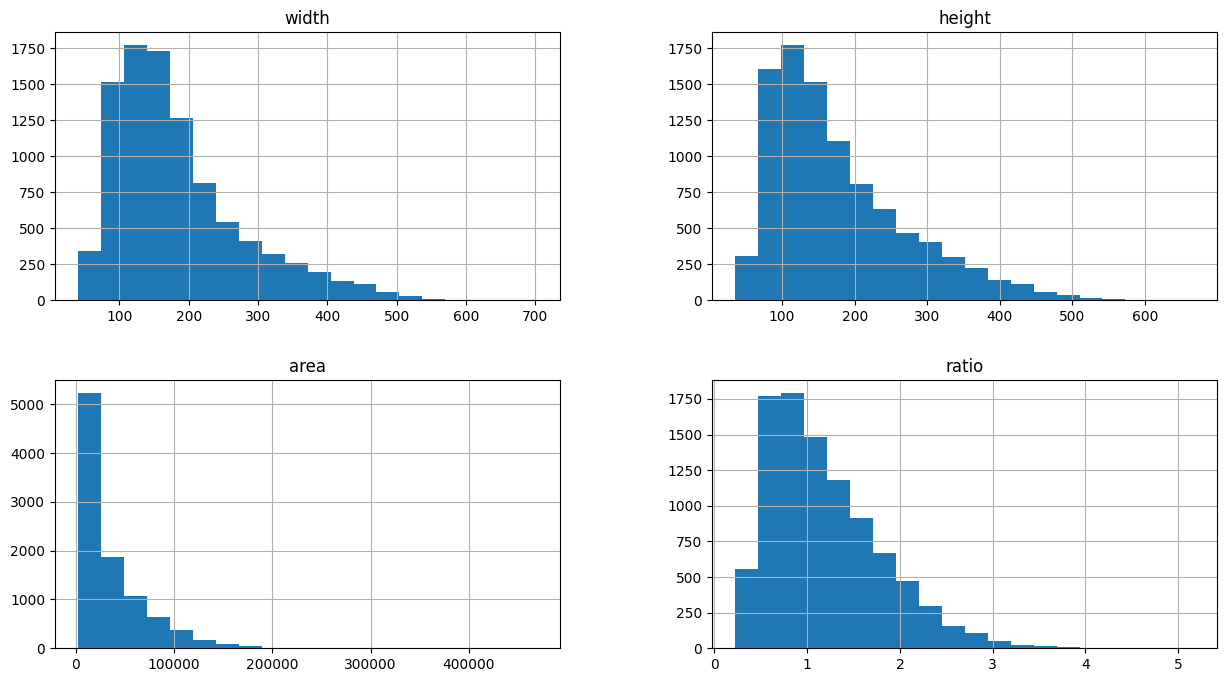

In [17]:
images.hist(figsize=[15,8], bins=20)

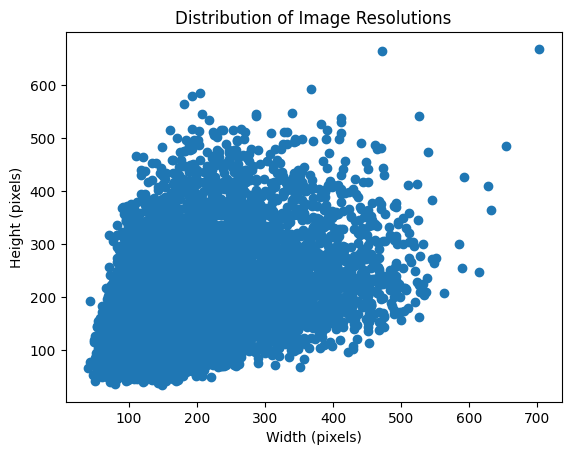

In [18]:
plt.scatter(images["width"],images["height"])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

width                                                   703
height                                                  668
area                                                 469604
ratio                                              1.052395
label                                              canister
image     <PIL.JpegImagePlugin.JpegImageFile image mode=...
Name: 7220, dtype: object


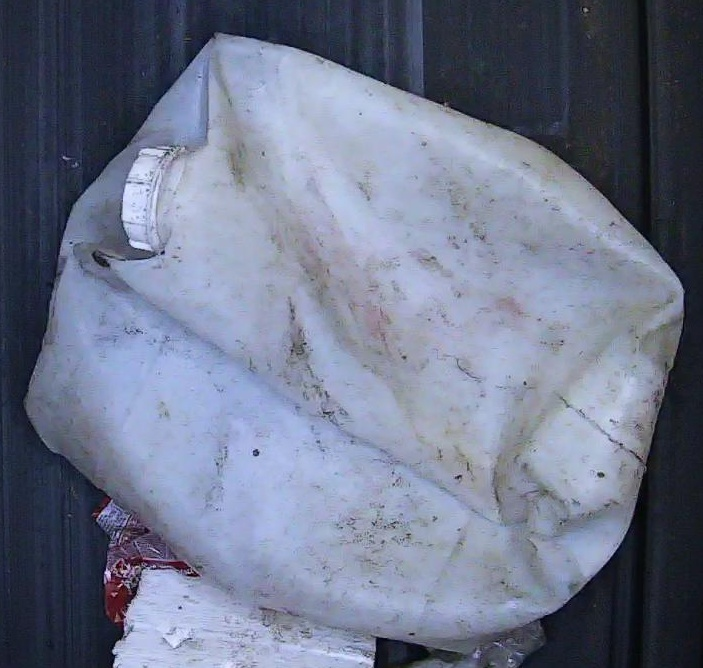

In [19]:
maximum_image = images.loc[images['area'].idxmax()]
print(maximum_image)
display(maximum_image["image"])

width                                                    50
height                                                   43
area                                                   2150
ratio                                              1.162791
label                                                  cans
image     <PIL.JpegImagePlugin.JpegImageFile image mode=...
Name: 7606, dtype: object


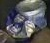

In [20]:
minimum_image = images.loc[images['area'].idxmin()]
print(minimum_image)
display(minimum_image["image"])

width                                                   352
height                                                   68
area                                                  23936
ratio                                              5.176471
label                                            glass-dark
image     <PIL.JpegImagePlugin.JpegImageFile image mode=...
Name: 8996, dtype: object


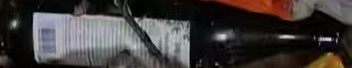

In [21]:
biggest_ratio = images.loc[images["ratio"].idxmax()]
print(biggest_ratio)
display(biggest_ratio["image"])

width                                                    70
height                                                  318
area                                                  22260
ratio                                              0.220126
label                                    bottle-transp-full
image     <PIL.JpegImagePlugin.JpegImageFile image mode=...
Name: 6596, dtype: object


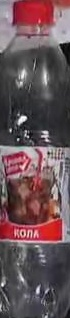

In [22]:
smallest_ratio = images.loc[images["ratio"].idxmin()]
print(smallest_ratio)
display(smallest_ratio["image"])

In [23]:
smallest_width = images.loc[images["width"].idxmin()]
largest_width =  images.loc[images["width"].idxmax()]

print("smallest width: " + str(smallest_width["width"]))
print("largest width: " + str(largest_width["width"]))

smallest width: 40
largest width: 703


In [24]:
smallest_height = images.loc[images["height"].idxmin()]
largest_height =  images.loc[images["height"].idxmax()]

print("smallest height: " + str(smallest_height["height"]))
print("largest height: " + str(largest_height["height"]))

smallest height: 35
largest height: 668


## Class distributions

Next to the image sizes, the class distributions is another important aspect to explore. You can use the following functions.
- Get the unique values in a list from a certain pandas column: <code>unique_values = dataframe["column"].unique()</code>
- To count the unique values in a column : <code>unique_values_counted = dataframe["column"].value_counts()</code>
- create a barplot in matplotlib from the counted values: <code>counted.plot(kind="bar")</code>

What does this distribution mean for the creation of our machine learning model?

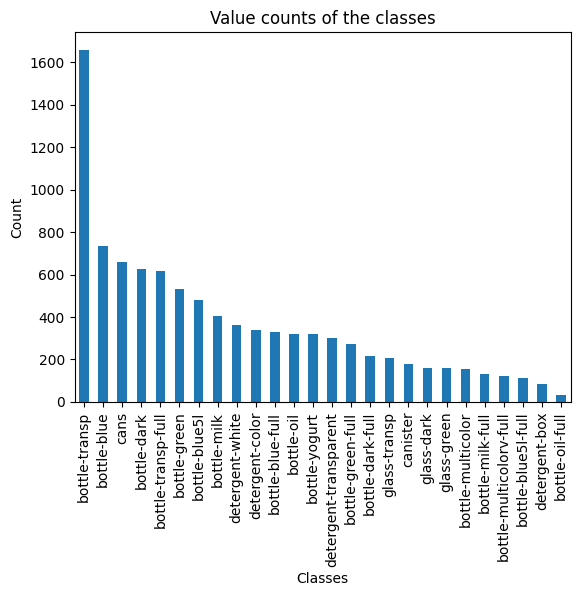

In [25]:
classes = images["label"].unique()
counted_classes = images["label"].value_counts()
counted_classes.plot(kind="bar")
plt.xlabel("Classes")
plt.ylabel('Count')
plt.title("Value counts of the classes")
plt.show()